In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import grad
import sklearn.metrics
import pylab

In [2]:
# Generate dataset
examples = 1000
features = 100
D = (npr.randn(examples,features),npr.randn(examples))

In [3]:
# Specify the network
layer1_units = 10
layer2_units = 1
w1 = npr.rand(features, layer1_units)
b1 = npr.rand(layer1_units)
w2 = npr.rand(layer1_units,layer2_units)
b2 = npr.rand(layer2_units)
theta = (w1,b1,w2,b2)

In [4]:
# Define the loss function
def squared_loss(y, yhat):
    return np.dot(
    (y-yhat),(y-yhat)
    )

In [5]:
# Define binary cross entropy
def binary_cross_entropy(y,yhat):
    return -1 * np.sum(
    (y*np.log(yhat)) + ((1-y)*np.log(1-yhat))
    )

In [6]:
# Create Neural Network wrapper
def neural_network(x, theta):
    w1,b1,w2,b2 = theta
    return np.tanh(
    np.dot(
    np.tanh(
    np.dot(x,w1)+b1
    ),w2
    )
        + b2
    )

In [7]:
# Wrapper around the objective function to be optimized
def objective_function(theta, idx):
    return squared_loss(
    D[1][idx], neural_network(D[0][idx],theta)
    )

In [8]:
# Update theta values
def update_theta(theta,delta,eta):
    w1,b1,w2,b2 = theta
    w1_delta,b1_delta,w2_delta,b2_delta = delta
    w1_new = w1 - eta * w1_delta
    b1_new = b1 - eta * b1_delta
    w2_new = w2 - eta * w2_delta
    b2_new = b2 - eta * b2_delta
    new_theta = (
    w1_new, b1_new,
        w2_new, b2_new
    )
    return new_theta

In [9]:
# Compute gradient
grad_objective = grad(objective_function)

RMSE before training: 0.3795


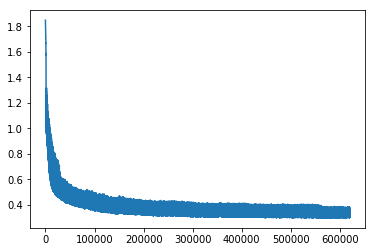

In [13]:
# Train the neural network
epochs = 500
learningRate = 0.01
print("RMSE before training: {:.4}".format(
sklearn.metrics.mean_squared_error(D[1],neural_network(
D[0],theta))
))
#rmse = []
for i in range(epochs):
    for j in range(examples):
        delta = grad_objective(theta,j)
        theta = update_theta(theta,delta, learningRate)
        rmse.append(sklearn.metrics.mean_squared_error(
        D[1],neural_network(
        D[0],theta)))

pylab.plot(rmse)
pylab.show()

In [14]:
print("RMSE after training: {:.4}".format(sklearn.metrics.mean_squared_error(D[1],neural_network(
D[0],theta))))

RMSE after training: 0.3354
